In [6]:
from cifar10_web import cifar10

train_images, train_labels, test_images, test_labels = cifar10(path=None)

Downloaded cifar-10-binary.tar.gz to /Users/ruben/data/cifar10


In [21]:
import matplotlib.pyplot as plt
import numpy as np

np.shape(train_images[0])

#train_images[0]

(3072,)

In [29]:
import pickle
import numpy as np
import random
random.seed(1) # set a seed so that the results are consistent

def load_batch():
    path = 'cifar-10-batches-py/'
    file = 'data_batch_1'

    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='latin1')
    images = dict['data']
    #images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict['labels']
    imagearray = np.array(images)   #   (10000, 3072)
    labelarray = np.array(labels)   #   (10000,)
    
    return imagearray, labelarray

def create_datasets(imagearray, labelarray):
    train_set_x = np.empty((200,3072))
    train_set_y = np.empty((1,200),dtype=np.int16)

    i = 0
    j = 0
    while (j < 200):                #   200 train images
        x = random.randint(0,1)
        if (labelarray[i] == 3):    #   Cats
            train_set_x[j] = imagearray[i]
            train_set_y[0,j] = 1    #   Cat is True
            j+=1
        elif (x % 2 == 0 and labelarray[i] != 3):   #    NOT Cats
            train_set_x[j] = imagearray[i]
            train_set_y[0,j] = 0    # Cat is False
            j+=1
        i+=1
        
    train_set_x = train_set_x.T     #   Reshape to (3072, 200) 
    
    test_set_x = np.empty((50,3072))                #   50 test images
    test_set_y = np.empty((1,50),dtype=np.int16)

    i = 0
    j = 0
    while (j < 50):
        x = random.randint(0,1)
        if (labelarray[9999-i] == 3):#  In Reverse Order is Cat
            test_set_x[j] = imagearray[9999-i]
            test_set_y[0,j] = 1
            j+=1
        elif (x % 2 == 0 and labelarray[i] != 3):
            test_set_x[j] = imagearray[9999-i]
            test_set_y[0,j] = 0
            j+=1
        i+=1

    test_set_x = test_set_x.T       #   Reshape to (3072, 50)

    train_set_x = train_set_x/255.  #   0-255 -> 0-1
    test_set_x = test_set_x/255.

    return train_set_x, train_set_y, test_set_x, test_set_y

imgs, _ = load_batch()

0


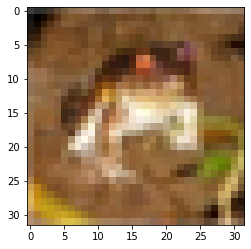

1


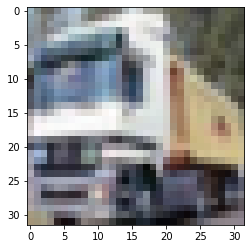

2


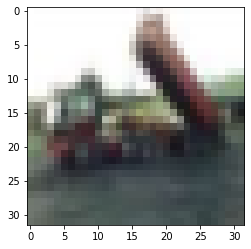

3


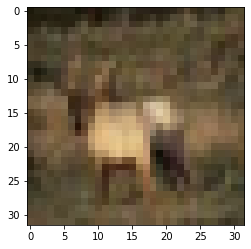

4


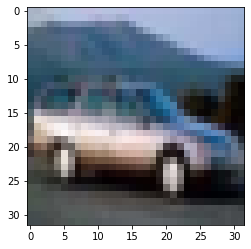

5


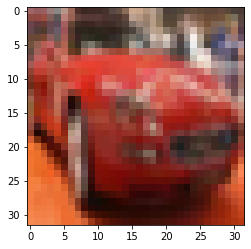

6


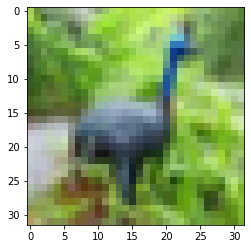

7


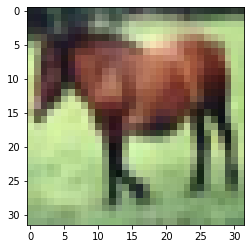

8


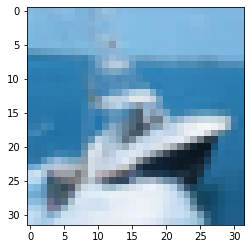

9


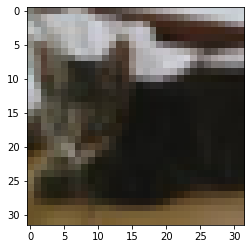

In [52]:
imgs, _ = load_batch()

def show_img(i):
    lim = 3072//3
    red = imgs[i][:lim]
    green = imgs[i][lim:2*lim]
    blue = imgs[i][2*lim:]

    red = np.array(red).reshape((32, 32))
    green = np.array(green).reshape((32, 32))
    blue = np.array(blue).reshape((32, 32))

    img = np.dstack((red, green, blue))

    plt.imshow(img)
    plt.show()

idx = 1

for i in range(10):
    print(i)
    show_img(i)


In [47]:
np.dstack?

Signature: np.dstack(tup)
Docstring:
Stack arrays in sequence depth wise (along third axis).

This is equivalent to concatenation along the third axis after 2-D arrays
of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
`(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
`dsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of arrays
    The arrays must have the same shape along all but the third axis.
    1-D or 2-D arrays must have the same shape.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays, will be at least 3-D.

See Also
--------
concatenate : Join a sequence of arrays along an existing axis.
stack : Join a sequence of arrays alo